In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mnist_train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# seperate label(output) and features(input) data

op = data["label"]
ip = data.iloc[:,1:785]

print(op.head())
print(ip.head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixe

In [10]:
print(op.shape)
print(ip.shape)

# so n = 42k and features(d) = 784 

(42000,)
(42000, 784)


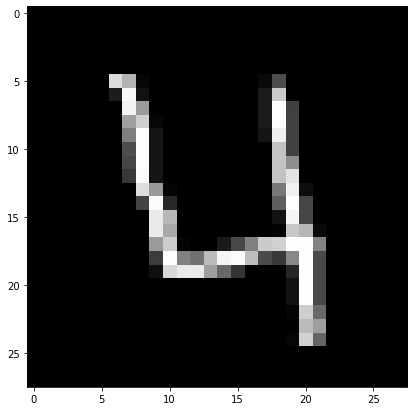

4


In [23]:
# converting to 28x28 matrix
plt.figure(figsize=(7,7))
idx=3
grid_data = np.asarray(ip.iloc[idx]).reshape(28,-1)
plt.imshow(grid_data,cmap="gray")
plt.show()
print(op[idx])

In [24]:
# Data preprocessing: standardising the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(ip)

print(standardized_data.shape)

(42000, 784)


In [101]:
sample_data = standardized_data

covar_mat = (1/42000)*np.matmul(sample_data.T, sample_data)

covar_mat.shape

(784, 784)

In [102]:
from scipy.linalg import eigh

## eighen values will be printed from low to high values(ascending order)

values, vectors = eigh(covar_mat,eigvals=(782,783))

print(vectors.shape)
print(sample_data.shape)

new_coordinates = np.matmul(sample_data,vectors)

print(new_coordinates.shape)
print(op.shape) ##as its one dimension it will be by default taken as row vector with 1x42k

(784, 2)
(42000, 784)
(42000, 2)
(42000,)


In [103]:
new_coordinates = np.vstack((new_coordinates.T,op)).T

df = pd.DataFrame(new_coordinates,columns = ["1st_prinicipal","2nd_prinicipal","output"])
print(df.head())

   1st_prinicipal  2nd_prinicipal  output
0       -5.226445       -5.140478     1.0
1        6.032996       19.292332     0.0
2       -1.705813       -7.644503     1.0
3        5.836139       -0.474207     4.0
4        6.024818       26.559574     0.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


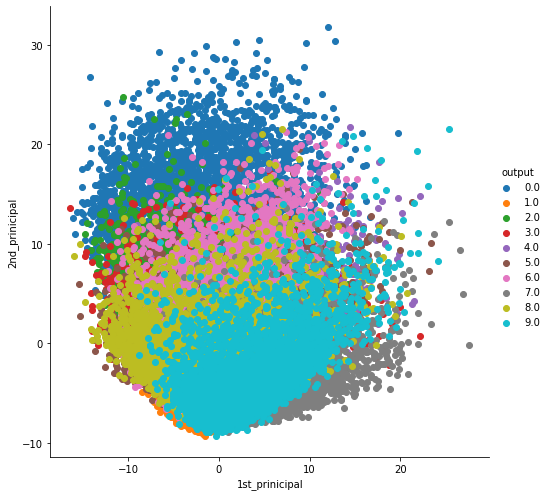

In [104]:
import seaborn as sns
sns.FacetGrid(df,hue="output",size=7).map(plt.scatter,"1st_prinicipal","2nd_prinicipal").add_legend()
plt.show()

In [105]:
from sklearn import decomposition
pca = decomposition.PCA()

In [106]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data.shape

(42000, 2)

In [107]:
pca_data = np.vstack((pca_data.T,op)).T

df1 = pd.DataFrame(data=pca_data,columns=["1st_princ","2nd_princ","o/p"])
df1.head()

,1st_princ,2nd_princ,o/p
0,-5.140565,-5.226241,1.0
1,19.292357,6.033161,0.0
2,-7.644420,-1.705919,1.0
3,-0.474186,5.835928,4.0
4,26.559622,6.024821,0.0


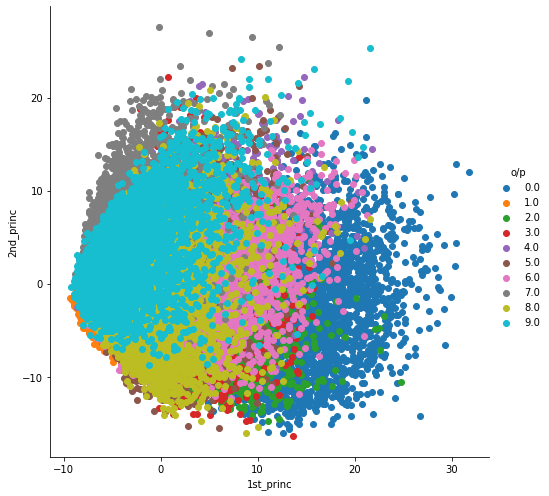

In [108]:
sns.FacetGrid(df1,hue="o/p",height=7).map(plt.scatter,"1st_princ","2nd_princ").add_legend()
plt.show()

In [124]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

tsne_data = tsne.fit_transform(standardized_data)

tsne_data.shape


(42000, 2)

In [126]:
tsne_data = np.vstack((tsne_data.T,op)).T

df2 = pd.DataFrame(data=tsne_data,columns = ["1st_comp","2nd_comp","o/p"])

sns.FacetGrid(df2, hue="o/p", size= 20).map(plt.scatter,"1st_comp","2nd_comp").add_legend()

plt.show()

ValueError: Shape of passed values is (42000, 4), indices imply (42000, 3)